In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [12]:
learning_rate = 0.05
training_epochs = 500
display_step = 50

In [14]:
# Training Data
train_X = numpy.asarray([3.9,4.7,5.58,6.71,6.93,4.16,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.31,7.987,5.654,9.27,3.1])
train_Y = numpy.asarray([1.79,2.768,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


In [15]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [16]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


In [17]:
 #Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Epoch: 0050 cost= 0.080246165 W= 0.288213 b= 0.466867
Epoch: 0100 cost= 0.077814981 W= 0.27795 b= 0.543759
Epoch: 0150 cost= 0.076466881 W= 0.27034 b= 0.600769
Epoch: 0200 cost= 0.075717196 W= 0.264698 b= 0.643037
Epoch: 0250 cost= 0.075298682 W= 0.260514 b= 0.674376
Epoch: 0300 cost= 0.075063854 W= 0.257413 b= 0.697611
Epoch: 0350 cost= 0.074931256 W= 0.255113 b= 0.714838
Epoch: 0400 cost= 0.074855760 W= 0.253408 b= 0.727611
Epoch: 0450 cost= 0.074812330 W= 0.252144 b= 0.73708
Epoch: 0500 cost= 0.074787006 W= 0.251207 b= 0.744102
Optimization Finished!
Training cost= 0.074787 W= 0.251207 b= 0.744102 



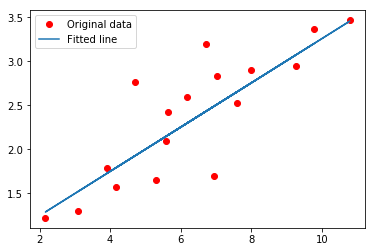

Testing... (Mean square loss Comparison)
Testing cost= 0.0817339
Absolute mean square loss difference: 0.00694687


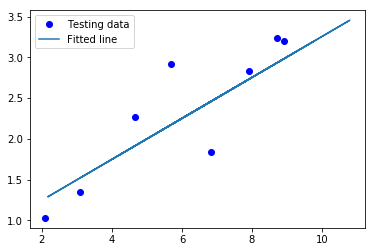

In [18]:
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

 # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()